## 분류 모형 성능 평가

  - **문제 상황**: 모델의 예측 결과를 단순히 '맞았다/틀렸다'의 비율(**정확도**)로만 평가하는 것은 위험할 수 있음.
  - **예시**: 암 진단 모델이 실제 암 환자를 '정상'으로 잘못 예측(**False Negative**)하는 경우는 치명적이며, 정상인을 '암 의심'으로 예측(**False Positive**)하는 경우는 막대한 사회적 비용을 유발함.
  - **필요성**: 어떤 종류의 실수를 더 피해야 하는지 비즈니스 상황에 맞게 판단하고, 모델의 성능을 다각도로 측정할 수 있는 정교한 \*\*'성능 평가 지표'\*\*가 필요함.

-----

## 핵심 원리 파헤치기 (Deep Dive)

  - **`혼동 행렬(Confusion Matrix)`**: 분류 모델 성능 평가의 첫걸음. 모델이 얼마나 '혼동'하는지, 즉 정답과 예측이 얼마나 일치/불일치하는지를 표로 정리한 것.

  - **'양치기 소년' 비유**

      - **`TP (True Positive)`**: 늑대가 있을 때 "늑대다\!"라고 외침 (정확한 예측).
      - **`TN (True Negative)`**: 늑대가 없을 때 가만히 있음 (정확한 예측).
      - **`FP (False Positive)`**: 늑대가 없는데 "늑대다\!"라고 외침 (잘못된 경보, **Type I Error**).
      - **`FN (False Negative)`**: 늑대가 있는데 가만히 있음 (치명적인 실수, **Type II Error**).

  - **주요 평가 지표**

      - **`정밀도(Precision)`**: 모델의 Positive 예측이 얼마나 정확한지를 측정 ("늑대라고 외쳤을 때, 진짜 늑대가 나타난 비율").
      - **`재현율(Recall)`**: 실제 Positive를 얼마나 잘 찾아내는지를 측정 ("실제 늑대 중 소년이 외친 비율").
      - 비즈니스 문제에 따라 어떤 실수를 줄이는 것이 더 중요한지 판단하여 적절한 평가 지표를 선택해야 함.

-----

## 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 4.1. 사이킷런의 모형 평가 방법

1.  **예측모형의 `score` 메서드**: 모델 객체의 기본 평가 방법. 분류 모델의 경우 \*\*`정확도(accuracy)`\*\*를 반환함.
2.  **`metrics` 함수**: `sklearn.metrics` 모듈이 제공하는 포괄적인 평가 함수들.
3.  **`scoring` 매개변수**: `cross_val_score()` 등 교차 검증 도구에서 평가 규칙을 직접 지정할 때 사용.

<!-- end list -->

In [1]:
# 사용 가능한 모든 scoring 매개변수 키를 확인합니다.
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

-----

### 4.2. 분류모형 평가를 위한 `scoring` 속성

  - `cross_val_score()` 함수 내 `scoring` 인자는 모델 성능 평가에 어떤 측정 기준을 적용할지 지정하는 중요한 매개변수임.

  - **`cross_val_score` 함수 구문**

```
sklearn.model_selection.cross_val_score(estimator, X,
    				y=None,groups=None, scoring=None, cv='warn',
    				n_jobs=None,verbose=0, fit_params=None,
    				pre_dispatch='2*n_jobs',
    				error_score='raise-deprecating')
```

- **Classification 모형의 scoring 매개변수의 값과 평가함수**

| Scoring | 함수 | 참고 |
| :--- | :--- | :--- |
| accuracy | `metrics.accuracy_score` | 정확도 |
| balanced\_accuracy | `metrics.balanced_accuracy_score` | 이진 분류기(바이너리 타겟) 용 |
| average\_precision | `metrics.average_precision_score` | 평균 정밀도 |
| brier\_score\_loss | `metrics.brier_score_loss` | |
| f1 | `metrics.f1_score` | f1-score |
| f1\_micro | `metrics.f1_score` | 미시 평균 |
| f1\_macro | `metrics.f1_score` | 거시 평균 |
| f1\_weighted | `metrics.f1_score` | 가중 평균 |
| f1\_samples | `metrics.f1_score` | 멀티 라벨 샘플 |
| neg\_log\_loss | `metrics.log_loss` | `predict_proba` support가 필요 |
| precision etc. | `metrics.precision_score` | 접미사는 'f1'과 같이 적용 |
| recall etc. | `metrics.recall_score` | 접미사는 'f1'과 같이 적용 |
| roc\_auc | `metrics.roc_auc_score` | ROC와 AUC를 계산 |

-----

### 4.3. Scikit-Learn에서 지원하는 성능평가 함수

  - `sklearn.metrics` 모듈은 실제값(`y_true`)과 예측값(`y_pred`)을 인자로 받아 평가 점수를 계산하는 다양한 함수를 제공함.

-----

### 4.4. Confusion Matrix 분류 결과표

  - **`혼동 행렬(Confusion Matrix)`**: 실제 클래스와 모델이 예측한 클래스가 얼마나 일치하는지를 숫자로 나타낸 표.

  - **이진 분류 결과표 (Binary Confusion Matrix)**

      - **`True Positive (TP)`**: 실제 Positive를 Positive로 올바르게 예측.
      - **`True Negative (TN)`**: 실제 Negative를 Negative로 올바르게 예측.
      - **`False Positive (FP)`**: 실제 Negative를 Positive로 잘못 예측.
      - **`False Negative (FN)`**: 실제 Positive를 Negative로 잘못 예측.

  - **예시: 금융 사기 탐지 시스템(FDS)**

      - **`TP`**: 사기를 사기로 정확하게 예측.
      - **`TN`**: 정상을 정상으로 정확하게 예측.
      - **`FP`**: 정상을 사기로 잘못 예측 (고객 피해).
      - **`FN`**: 사기를 정상으로 잘못 예측 (회사 손실).

<!-- end list -->

In [2]:
import numpy as np

# 가상의 혼동 행렬 데이터 생성
# [[TN, FP],
#  [FN, TP]]
table = np.array([[1613,   22], # 실제: 일반 고객 (Negative)
                  [  81,   77]]) # 실제: 보험 사기자 (Positive)



### 4.5. 분류표 API

In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# 예제 데이터
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2] # 실제값
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 1] # 예측값

# 1. Scikit-learn의 confusion_matrix 사용
# 행: 실제값(y_true), 열: 예측값(y_pred)
cm = confusion_matrix(y_true, y_pred)
print("Scikit-learn confusion_matrix 결과:")
print(cm)

print("-" * 35)

# 2. Pandas의 crosstab 사용
df = pd.DataFrame({"y_true":y_true, "y_pred":y_pred})
# margins=True 옵션으로 행/열별 합계를 함께 볼 수 있습니다.
crosstab_df = pd.crosstab(df.y_true, df.y_pred, rownames=['y_true'], colnames=['y_pred'], margins=True)
print("Pandas crosstab 결과:")
print(crosstab_df)

Scikit-learn confusion_matrix 결과:
[[2 1 0]
 [1 2 0]
 [0 2 1]]
-----------------------------------
Pandas crosstab 결과:
y_pred  0  1  2  All
y_true              
0       2  1  0    3
1       1  2  0    3
2       0  2  1    3
All     3  5  1    9


-----

### 4.6. 혼동행렬을 이용한 평가 방법

| 평가방법 | 계산식 | 의미 |
| :--- | :--- | :--- |
| **정확도 (Accuracy)** | $$\frac{(TP+TN)} {(TP+FP+FN+TN)}$$ | 전체 예측에서 옳은 예측의 비율 |
| **정밀도 (Precision)** | $$\frac{TP}{(FP+TP)}$$ | Y로 예측된 것 중 실제로도 Y인 경우의 비율 |
| **민감도 (Recall)** | $$\frac{TP}{(FN+TP)}$$ | 실제로 Y인 것들 중 예측이 Y로 된 경우 비율 (=Sensitivity, True Positive Rate) |
| **특이도 (Specificity)** | $$\frac{TN}{(TN+FP)}$$ | 실제로 N인 것들 중 예측이 N으로 된 경우의 비율 |
| **오류율 (Fall-Out)** | $$\frac{FP}{(TN+FP)}$$ | Y가 아닌데 Y로 예측된 비율. 1-Specificity와 같은 값 (False Positive Rate) |
| **F-measure** | $$2 * \frac{(Precision * Recall)}{(Precision + Recall)}$$ | Precision과 Recall의 조화 평균. 두 값이 골고루 클 때 큰 값을 가짐. |

#### 예시 데이터로 직접 계산하기

In [4]:
# 보험사기 데이터 로드 (가상의 예측 결과 파일)
result_url = "http://javaspecialist.co.kr/pds/382"
result = pd.read_csv(result_url)

# Pandas crosstab으로 혼동 행렬 확인
pd.crosstab(result.y_true, result.y_pred)

y_pred,0,1
y_true,,
0,1613,22
1,81,77


1)  **`Accuracy(정확도)`**

In [5]:
# 정확도 계산
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(result.y_true, result.y_pred)
print(f"정확도: {accuracy}")

정확도: 0.9425543781372002


2)  **`Precision(정밀도)`**

In [6]:
# 정밀도 계산
from sklearn.metrics import precision_score
precision = precision_score(result.y_true, result.y_pred)
print(f"정밀도: {precision}")

정밀도: 0.7777777777777778


3)  **`Recall(재현율)`**

In [7]:
# 재현율(민감도) 계산
from sklearn.metrics import recall_score
recall = recall_score(result.y_true, result.y_pred)
print(f"재현율(민감도): {recall}")

재현율(민감도): 0.4873417721518987


4)  **`Specificity(특이도)`**

In [10]:
# 특이도 계산 (Negative 클래스(0)에 대한 재현율)
specificity = recall_score(result.y_true, result.y_pred, pos_label=0)
print(f"특이도: {specificity}")

특이도: 0.9865443425076452


5)  **`Fall-Out(위양성율)`**

In [11]:
# 위양성률(Fall-Out) 계산
fallout = 1 - specificity
print(f"위양성률(Fall-Out): {fallout}")

위양성률(Fall-Out): 0.013455657492354778


6)  **`F(beta) score`**

In [12]:
# F1-score 계산
from sklearn.metrics import f1_score
f1 = f1_score(result.y_true, result.y_pred)
print(f"F1 점수: {f1}")

F1 점수: 0.5992217898832685


7)  **`classification_report`**

In [13]:
# 붓꽃(iris) 데이터셋으로 classification_report 예제 실습
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. 데이터 준비
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:,:-1]
iris_y = iris.iloc[:,-1]

# 2. 훈련/테스트 데이터 분할
train_X, test_X, train_y, test_y = train_test_split(iris_X,iris_y,
													test_size=0.3,random_state=1)

# 3. 모델 학습 및 예측
dt_model = DecisionTreeClassifier().fit(train_X, train_y) # 의사결정나무 모델 학습
pred = dt_model.predict(test_X) # 테스트 데이터로 예측

# 4. 분류 리포트 출력
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



<!-- end list -->

  - **정밀도와 재현율의 관계 (Trade-off)**: **정밀도**와 **재현율**은 일반적으로 반비례 관계(**`trade-off`**)에 있음. 재현율을 높이기 위해 판정 기준을 낮추면(조금만 의심스러워도 Positive로 예측), 실제 Negative를 Positive로 잘못 판단하는 경우(FP)가 늘어나 정밀도가 떨어지게 됨.

-----

### 4.7. ROC와 AUC

1)  **`ROC (Receiver Operator Characteristic) 커브`**: 분류 모델의 판별 기준값(threshold) 변화에 따라 **`위양성률(Fall-Out, FPR)`** 대비 \*\*`재현율(Recall, TPR)`\*\*의 변화를 시각화한 그래프. 그래프가 **왼쪽 위 모서리(0, 1)에 가까울수록** 성능이 좋은 모델임.

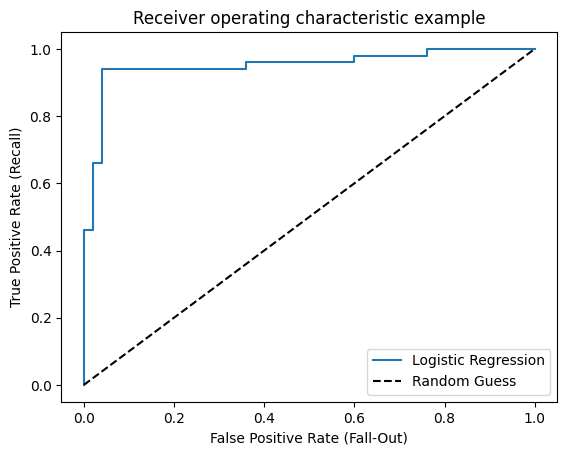

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# 1. 예제 데이터 생성
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                         n_redundant=0, random_state=0)

# 2. 모델 학습
model = LogisticRegression(random_state=0).fit(X, y)

# 3. roc_curve 계산
# 판별 함수 decision_function()의 결과값을 이용해 FPR, TPR, 임계값을 계산
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

# 4. ROC 커브 시각화
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess") # 무작위 예측선
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()

2)  **`AUC (Area Under the Curve)`**: ROC 커브 아래의 면적. **0과 1 사이**의 값을 가지며, **1에 가까울수록** 모델의 성능이 우수함을 나타냄. 모델이 Positive와 Negative 클래스를 얼마나 잘 구별하는지를 나타내는 종합적인 성능 지표임.

Logistic Regression AUC: 0.9113
Kernel SVM AUC: 0.9037


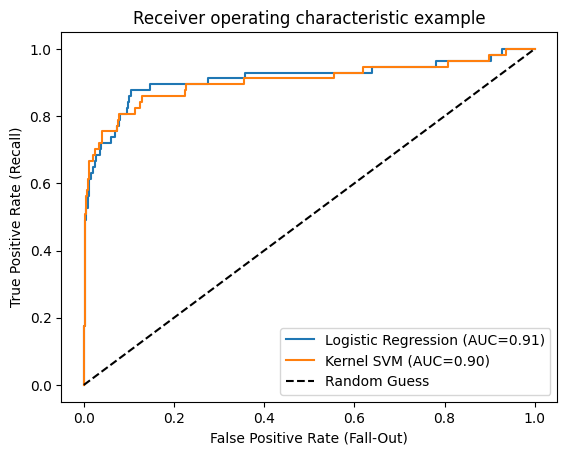

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import auc

# 1. 비교할 두 개의 모델 학습
# 데이터는 불균형 데이터셋으로 생성
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

model1 = LogisticRegression().fit(X, y)
# SVC 모델은 decision_function을 제공하며, probability=True로 확률 예측도 가능
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)

# 2. 각 모델의 ROC 커브 계산
fpr1, tpr1, _ = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, _ = roc_curve(y, model2.decision_function(X))

# 3. 각 모델의 AUC 계산
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

print(f"Logistic Regression AUC: {auc1:.4f}")
print(f"Kernel SVM AUC: {auc2:.4f}")

# 4. ROC 커브 시각화로 비교
plt.plot(fpr1, tpr1, label=f"Logistic Regression (AUC={auc1:.2f})")
plt.plot(fpr2, tpr2, label=f"Kernel SVM (AUC={auc2:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.show()

<!-- end list -->

  - **코드 해설**: 혼동 행렬 상으로는 두 모델의 성능이 비슷해 보일 수 있지만, **ROC 커브**와 **AUC**를 비교하면 Logistic Regression 모델이 전반적인 판별 능력에서 미세하게 더 우수함을 알 수 있음. **AUC**는 모델 성능을 하나의 숫자로 요약하여 객관적인 비교를 가능하게 함.

-----

### 4.8. 분류 모형의 성능 비교

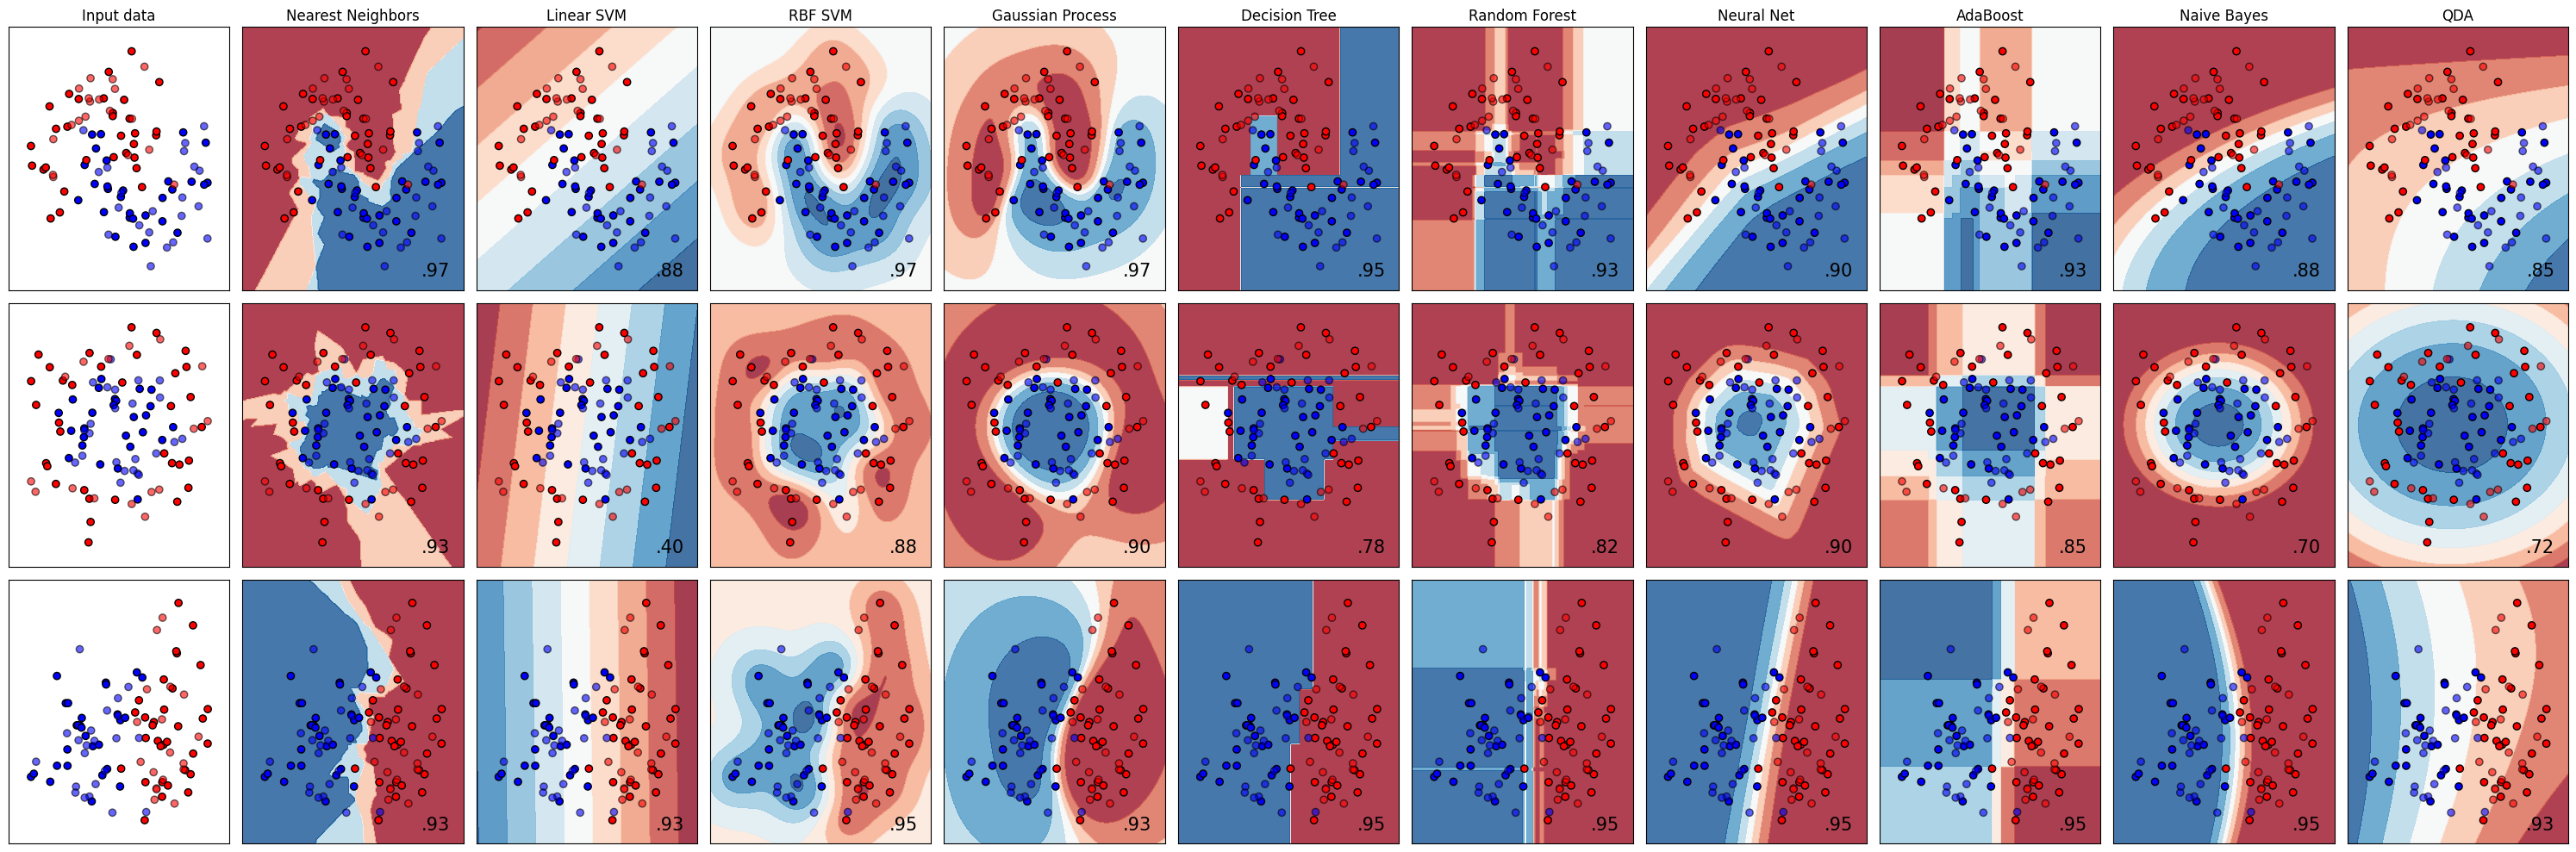

In [16]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# 1. 비교할 분류 모델들 정의
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# 2. 비교에 사용할 데이터셋 생성 (선형, 원형, 달 모양)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

# 3. 시각화 준비
figure = plt.figure(figsize=(30, 10))
i = 1
h = .02  # step size in the mesh

# 4. 각 데이터셋에 대해 반복
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    train_X, test_X, train_y, test_y = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    ax.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=cm_bright, edgecolors='k')
    ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # 5. 각 분류기에 대해 반복
    for name, model in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        model.fit(train_X, train_y)
        score = model.score(test_X, test_y)

        if hasattr(model, "decision_function"):
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        ax.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=cm_bright, edgecolors='k')
        ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

- **코드 해설**: 이 시각화 결과는 어떤 데이터 분포에 어떤 모델이 강점을 보이는지 한눈에 파악하게 해줌. 예를 들어, 선형 SVM은 선형 분리 데이터에 강하지만, 복잡한 비선형 데이터(달, 원 모양)에서는 RBF SVM이나 Random Forest 같은 모델이 더 효과적인 결정 경계를 형성함을 확인할 수 있음.

-----

## 핵심 요약 (Key Takeaways)

  - **비즈니스 맥락이 평가 지표를 결정합니다**: 단순 \*\*`정확도`\*\*는 위험할 수 있음. 비즈니스 상황에서 어떤 오류(FN or FP)의 비용이 더 큰지를 파악하고, 그에 맞는 **`정밀도`**, **`재현율`** 등의 지표를 선택해야 함.
  - **불균형 데이터에서는 `정확도`의 함정을 경계해야 합니다**: 데이터의 99%가 A 클래스일 때, 모두 A로 예측해도 정확도는 99%임. **`혼동 행렬`**, **`F1-score`**, **`AUC`** 등은 불균형 데이터셋에서 모델의 실제 성능을 더 잘 보여줌.
  - **`ROC 커브`와 `AUC`로 모델의 종합적인 판별 능력을 평가하세요**: \*\*`ROC 커브`\*\*는 모델의 특성을 시각적으로 이해하게 돕고, **`AUC`** 점수는 여러 모델을 객관적으로 비교하는 강력한 단일 기준이 됨.